In [15]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm as cmap
from mpl_toolkits.mplot3d.axes3d import *


In [ ]:
def slices(array, n):
    data = []
    for i in range(0,100,n):
        slice = array[:,:, i:i+n].sum(axis=2)//n
        data.append(slice)
    return data



In [23]:
def getFileNames(fileCount):
    data = []
    for i in range(0, fileCount):
        name = "Data\\Pf0" + str(i+1)+ ".bin";
        data.append(name)
    return data

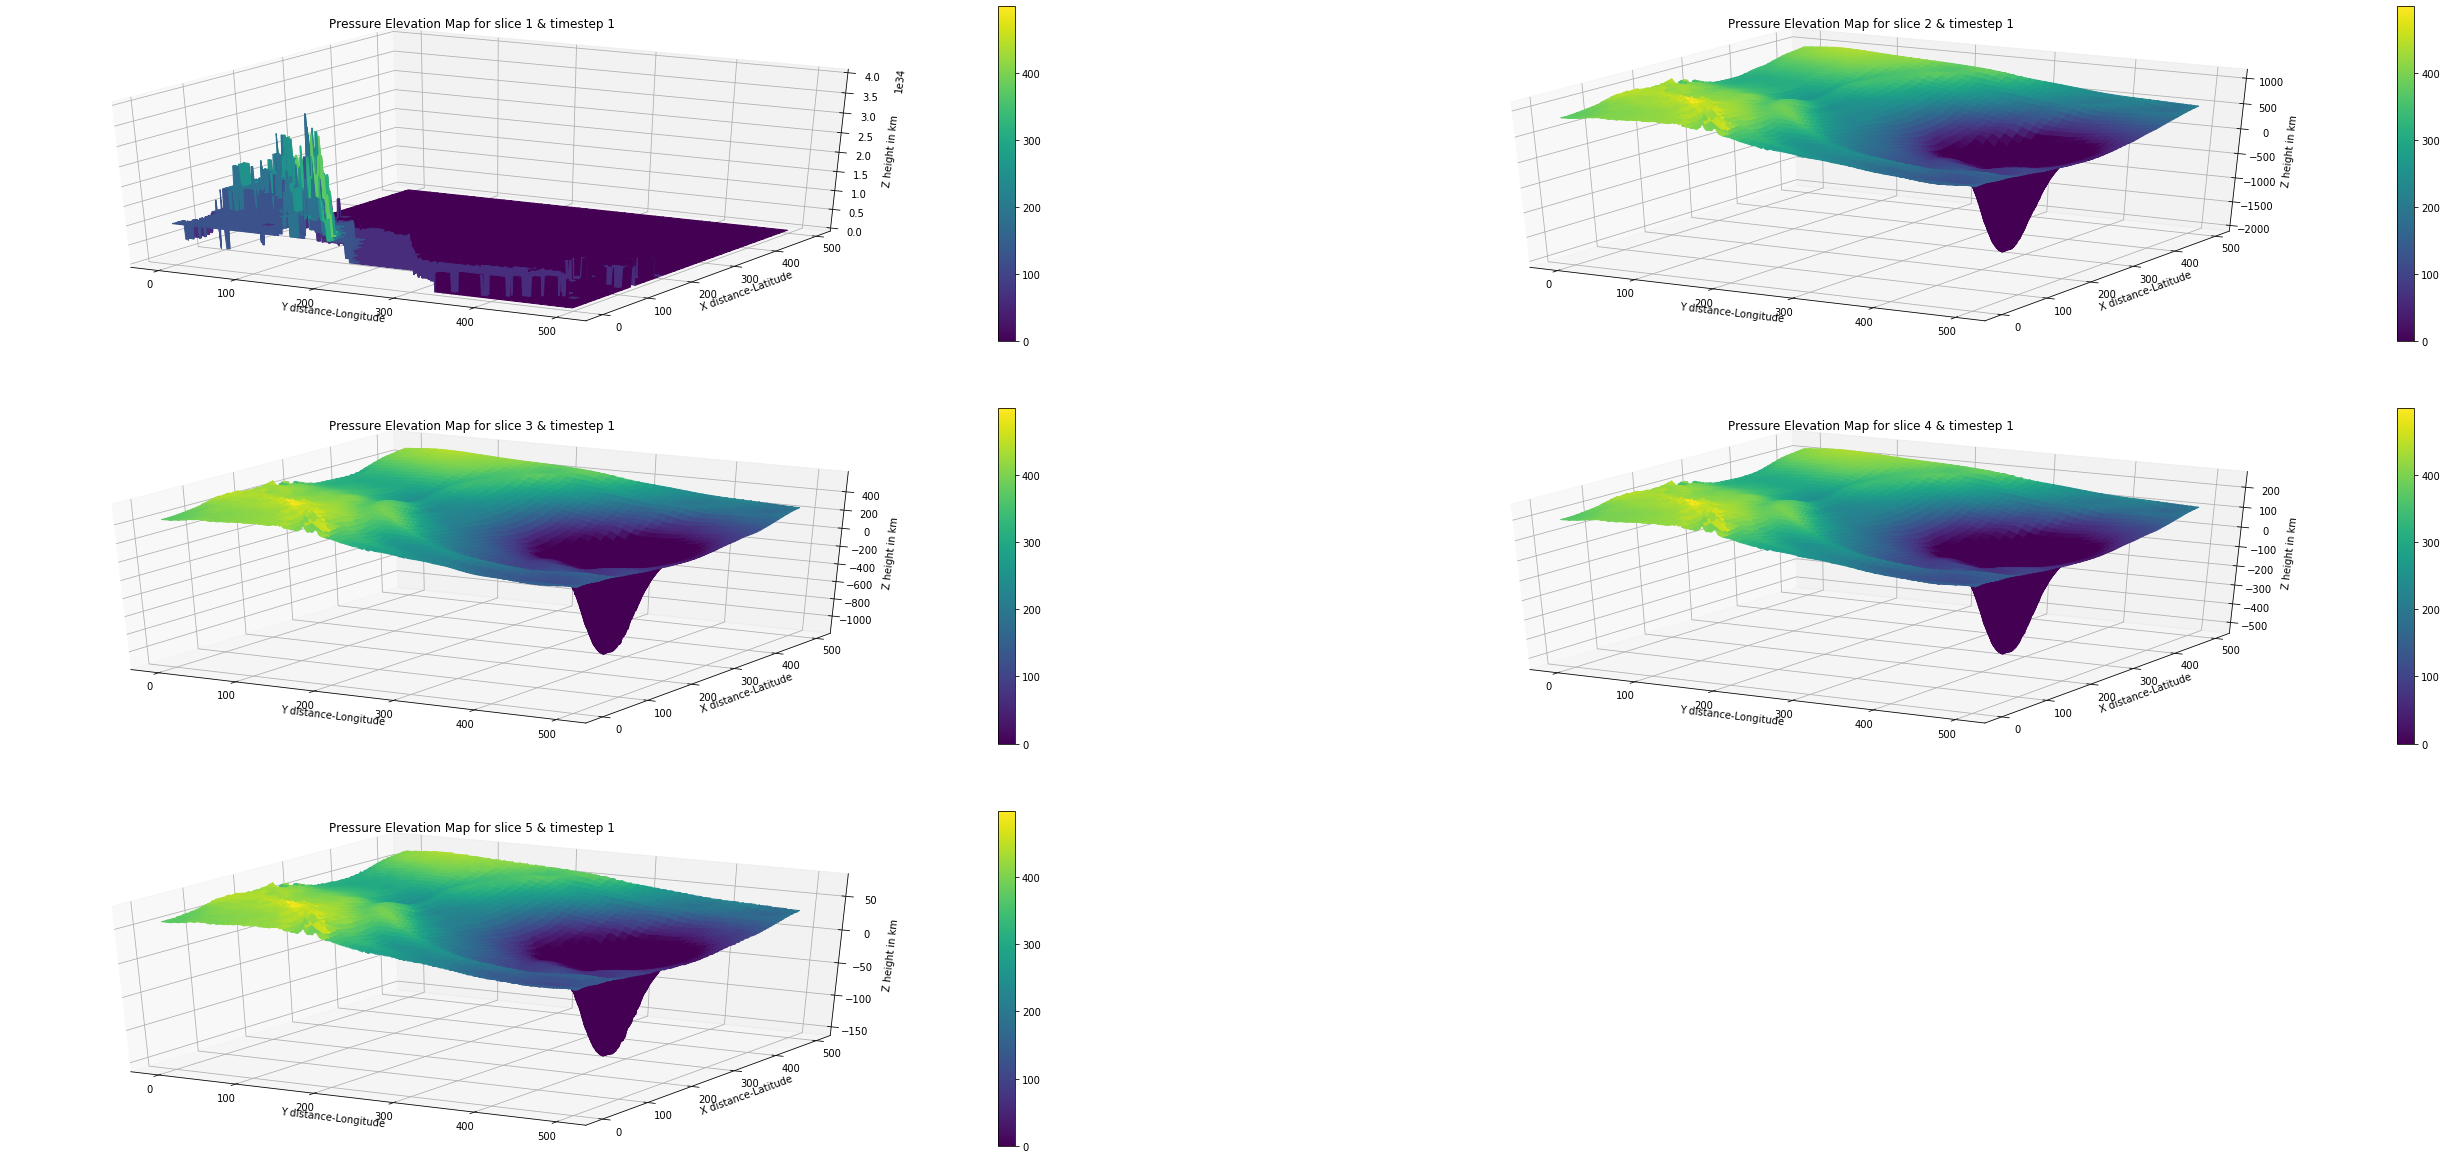

In [24]:
files = getFileNames(1)
timestep = 1
n = 20
rows = 100//n
for i in files:
        with open(i,"rb") as f:
            arr = np.fromfile(f, dtype='>f')
            arr = np.reshape(arr, (500,500,100), order="F")
        
        data = slices(arr, n)
        fig=plt.figure(figsize=(15, 15))
        fig.subplots_adjust(bottom=0.2, right=2.5, top=2)
        x=y=list(range(0, 500))
        X, Y = np.meshgrid(x, y)
        for j in range(0, rows):
            ax=fig.add_subplot(rows, 2, j+1,projection='3d')
            my_col = cmap.viridis(data[j]/np.amax(data[j]))
            ax.plot_surface(Y, X, data[j],cmap=cmap.viridis,vmin=0.00000,vmax=0.00332,facecolors = my_col)
            m = cmap.ScalarMappable(cmap=cmap.viridis)
            m.set_array(X)
            plt.colorbar(m)
            plt.title("Pressure Elevation Map for slice %s & timestep %s "%(j+1, timestep))
            ax.set_ylabel("X distance-Latitude")
            ax.set_xlabel("Y distance-Longitude")
            ax.set_zlabel("Z height in km")
        timestep += 1